In [1]:
# tb_event_files = {
#     "Behavior Prediction": "./models/tensorboard/visnav/behavior_pred_exp/classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680640630.victoria.449002.0",
#     "No Behavior Prediction": "./models/tensorboard/visnav/behavior_pred_exp/no_classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680642727.victoria.802848.0" 
# }

## V1 AL experiment
# tb_event_files = {
#     "Pre-trained": "./models/tensorboard/V1_AL/downstream4/classification_sos/mlp/freeze_False/randperm_True/Big_fixed_noself-att/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(4, 4, 4)_4_256/events.out.tfevents.1681854897.victoria.3122656.1",
#     "Rand Init": "./models/tensorboard/V1_AL/downstream4/classification/mlp/False/rand_init/Big_fixed_noself-att/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(4, 4, 4)_4_256/events.out.tfevents.1681783354.victoria.1961137.1"
# }

# plt.suptitle("Mouse Image Classification Performance")
# tb_event_files = {
#     "Pre-trained": "./models/tensorboard/V1_AL/downstream4/classification/mlp/False/rand_init/Big_fixed_noself-att/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(4, 4, 4)_4_256/events.out.tfevents.1681783348.victoria.1961137.0",
#     "Rand Init": "./models/tensorboard/V1_AL/downstream4/classification_sos/mlp/freeze_False/randperm_True/Big_fixed_noself-att/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(4, 4, 4)_4_256/events.out.tfevents.1681854897.victoria.3122656.0"
# }

## Eye position lateral experiment
tb_event_files = {
    "Predict Neurons + Behavior": "./models/tensorboard/visnav/behavior_pred_exp/classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680640630.victoria.449002.0",
    "Predict Neuronls only": "./models/tensorboard/visnav/behavior_pred_exp/no_classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680642727.victoria.802848.0",
}    

AttributeError: 'NoneType' object has no attribute 'remove'

/home/antonis/miniconda3/envs/neuroformer/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


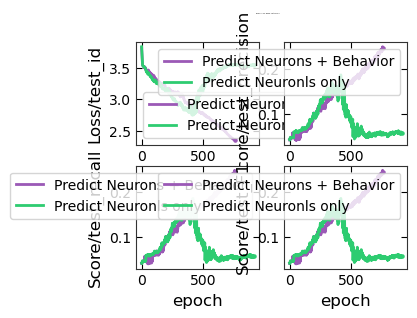

In [18]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
from neuroformer.visualize import nature_style

y_keys = ["Loss/test_id", "Score/test_precision", "Score/test_recall", "Score/test_F1"]
fig = plt.figure(figsize=(3.5, 3))

plt.suptitle("Eye pos vs. None, Lateral DS")
colors = ["#9b59b6", "#2ecc71"]
plt.xlabel("Epoch")
plt.ylabel("Neural Decoding Loss")
n_subplots = len(y_keys)
nrows = 2
ncols = n_subplots // nrows
dd_paths = []
for n_file, (key, log_file) in enumerate(tb_event_files.items()):
    for idx, y_key in enumerate(y_keys):
        plt.subplot(nrows, ncols, y_keys.index(y_key) + 1)
        event_accumulator = EventAccumulator(log_file)
        event_accumulator.Reload()
        tags = event_accumulator.Tags()['scalars']
        if y_key in tags:
            values = event_accumulator.Scalars(y_key)
            # plt.plot([x.step for x in values], [x.value for x in values], label=log_file)
            if len(values) < 100:
                continue
            else:
                dd_paths.append(log_file)
                df = pd.DataFrame({"epoch": [x.step for x in values], y_key: [x.value for x in values]})
                sns.lineplot(data=df, x="epoch", y=y_key, label=key, color=colors[n_file])
                plt.scatter(df["epoch"].iloc[-1], df[y_key].iloc[-1], color=colors[n_file], s=20)

ax.get_legend().remove()
plt.legend()
# make background non-transparent
fig.patch.set_alpha(1)
# save_path = "./models/tensorboard/visnav_lateral/plots"
# plt.savefig(os.path.join(save_path, "losses.png"), dpi=300)
# plt.savefig(os.path.join(save_path, "losses.svg"), dpi=300)

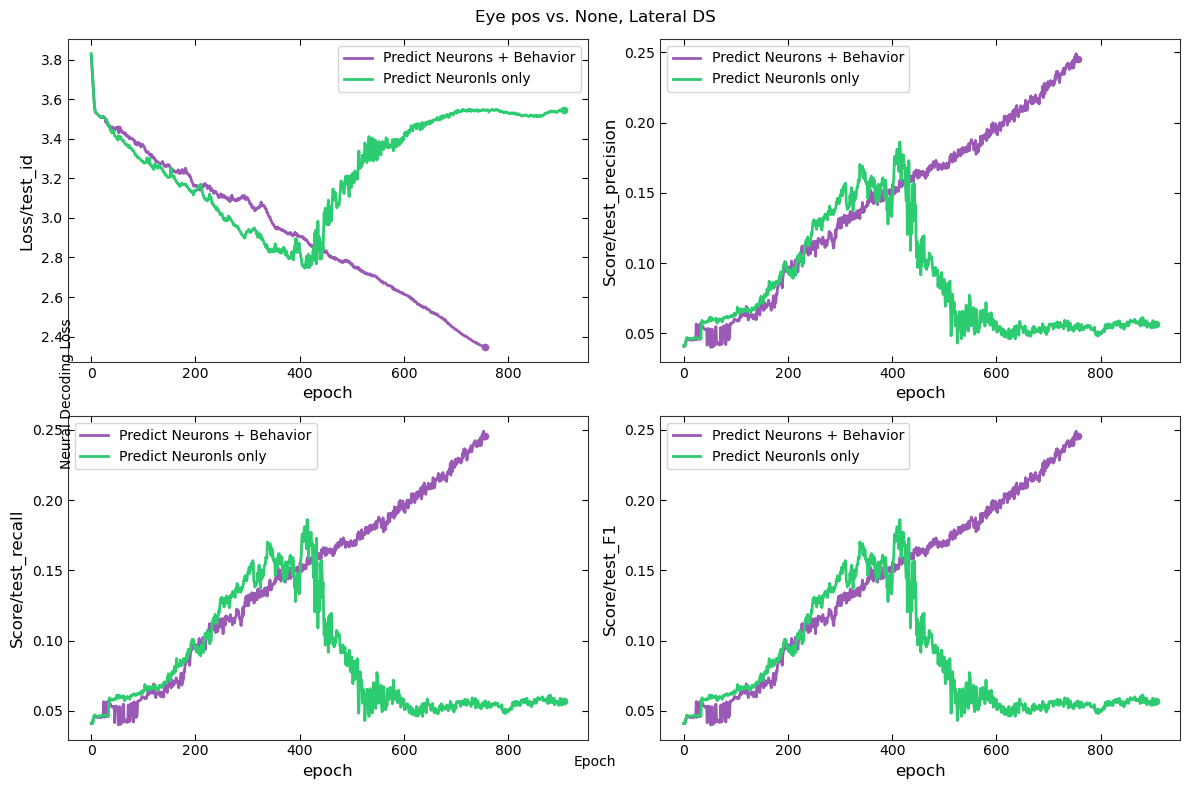

In [3]:
y_keys = ["Loss/test_id", "Score/test_precision", "Score/test_recall", "Score/test_F1"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle("Eye pos vs. None, Lateral DS")
fig.text(0.5, 0.04, "Epoch", ha="center", va="center")
fig.text(0.06, 0.5, "Neural Decoding Loss", ha="center", va="center", rotation=90)

colors = ["#9b59b6", "#2ecc71"]
n_subplots = len(y_keys)
dd_paths = []
for n_file, (key, log_file) in enumerate(tb_event_files.items()):
    for idx, y_key in enumerate(y_keys):
        row = idx // 2
        col = idx % 2
        ax = axs[row][col]
        event_accumulator = EventAccumulator(log_file)
        event_accumulator.Reload()
        tags = event_accumulator.Tags()['scalars']
        if y_key in tags:
            values = event_accumulator.Scalars(y_key)
            if len(values) < 100:
                continue
            else:
                dd_paths.append(log_file)
                df = pd.DataFrame({"epoch": [x.step for x in values], y_key: [x.value for x in values]})
                sns.lineplot(data=df, x="epoch", y=y_key, label=key, color=colors[n_file], ax=ax)
                ax.scatter(df["epoch"].iloc[-1], df[y_key].iloc[-1], color=colors[n_file], s=20)
        if idx == 0:
            ax.legend(loc="upper right")

# make background non-transparent
fig.patch.set_alpha(1)

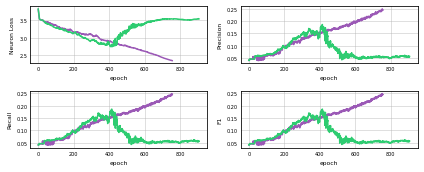

In [11]:
## Eye position lateral experiment
tb_event_files = {
    "Predict Neurons + Behavior": "./models/tensorboard/visnav/behavior_pred_exp/classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680640630.victoria.449002.0",
    "Predict Neuronls only": "./models/tensorboard/visnav/behavior_pred_exp/no_classification/window:0.05_prev:0.25/sparse_f:None_id:None/w:0.05_wp:0.25/6_Cont:False_window:0.05_f_window:0.2_df:0.005_blocksize:100_conv_True_shuffle:True_batch:224_sparse_(None_None)_blocksz446_pos_emb:False_temp_emb:True_drop:0.35_dt:True_2.0_52_max0.005_(8, 8, 8)_8_256/events.out.tfevents.1680642727.victoria.802848.0",
}    

import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
from neuroformer.visualize import nature_style
# nature_style()

y_keys = ["Loss/test_id", "Score/test_precision", "Score/test_recall", "Score/test_F1"]
y_key_labels = ["Neuron Loss", "Precision", "Recall", "F1"]
# fig.suptitle("Eye pos vs. None, Lateral DS")
# fig.text(0.5, 0.04, "Epoch", ha="center", va="center")
# fig.text(0.06, 0.5, "Neural Decoding Loss", ha="center", va="center", rotation=90)

colors = ["#9b59b6", "#2ecc71"]
n_subplots = len(y_keys)
dd_paths = []
fontsize = 6
labelsize = 5

# set label size
plt.rcParams['xtick.labelsize'] = labelsize
plt.rcParams['ytick.labelsize'] = labelsize

# set legend size
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['legend.title_fontsize'] = fontsize

# decrease label padding
plt.rcParams['xtick.major.pad'] = 1
plt.rcParams['ytick.major.pad'] = 1

# # make tick marks smaller
# plt.rcParams['xtick.major.size'] = 2
# plt.rcParams['ytick.major.size'] = 2

# disable tick marks
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False

# set axes label size
plt.rcParams['axes.labelsize'] = fontsize

line_types = ["--", ":"]

fig, axs = plt.subplots(2, 2, figsize=(6, 2.5))
for n_file, (key, log_file) in enumerate(tb_event_files.items()):
    for idx, y_key in enumerate(y_keys):
        row = idx // 2
        col = idx % 2
        ax = axs[row][col]
        event_accumulator = EventAccumulator(log_file)
        event_accumulator.Reload()
        tags = event_accumulator.Tags()['scalars']
        key_title = y_key_labels[idx]
        if y_key in tags:
            values = event_accumulator.Scalars(y_key)
            if len(values) < 100:
                continue
            else:
                dd_paths.append(log_file)
                df = pd.DataFrame({"epoch": [x.step for x in values], y_key: [x.value for x in values]})
                # if idx == 0:
                # Add legend to first subplot only
                sns.lineplot(data=df, x="epoch", y=y_key, label=key_title, 
                             color=colors[n_file], ax=ax)
                # ax.scatter(df["epoch"].iloc[-1], df[y_key].iloc[-1], color=colors[n_file], s=labelsize)
                ax.get_legend().remove()
                # ax.legend(loc="upper right")
                # else:
                #     # Hide legend on other subplots
                #     sns.lineplot(data=df, x="epoch", y=y_key, label=None, color=colors[n_file], ax=ax)
                #     ax.scatter(df["epoch"].iloc[-1], df[y_key].iloc[-1], color=colors[n_file], s=labelsize)
                ax.set_ylabel(key_title)
                ax.grid(alpha=0.5)


# ax.get_legend().remove()
# make background non-transparent
fig.patch.set_alpha(1)
plt.tight_layout()

save_path = "./models/tensorboard/visnav/behavior_pred_exp/plots"
plt.savefig(os.path.join(save_path, "losses.png"), dpi=300)
plt.savefig(os.path.join(save_path, "losses.pdf"), dpi=300)